# Gene Expression Analysis

In [1]:
from google.colab import drive
drive.mount('/MultiClusterGAN')
%cd /MultiClusterGAN/MyDrive/CNS/
%pip install  umap-learn scanpy

Mounted at /MultiClusterGAN
/MultiClusterGAN/MyDrive/CNS
     |████████████████████████████████| 86 kB 1.2 MB/s 
     |████████████████████████████████| 2.0 MB 35.2 MB/s 
     |████████████████████████████████| 1.1 MB 45.0 MB/s 
     |████████████████████████████████| 91 kB 7.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=9a3a68355a3ec42360e039d433fbe3405e3b1d0859761acaae92259047bd7cbf
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=1bf9ffae572149bf4837f87b477efd2b688de649511c3af65b09576d9ab9831b
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=3f39b01a73cd782f5967d61f4ec62fe4e66579a121d82

In [ ]:
# Loading the Packages

%reload_ext autoreload
%autoreload 2

import os
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

from tifffile import tifffile
from scipy import ndimage

# from starmap.obj import STARMapDataset, load_data
# import starmap.analyze as anz
# import starmap.viz as viz
# import starmap.sc_util as su
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
from anndata import AnnData

In [ ]:
# Colormap related
import colorsys
from random import shuffle

def intervals(parts, start_point, end_point):
    duration = end_point - start_point
    part_duration = duration / parts
    return [((i * part_duration + (i + 1) * part_duration)/2) + start_point for i in range(parts)]

## Input

In [ ]:
# combine_adata_obs=pd.read_csv('..\output_csv\self_defined_labels_new.csv')


In [ ]:
plot_path='tissue_region/output_data'
combine_adata_st_obs=pd.read_csv(plot_path+'/combine_adata_st_obs.csv')
combine_adata_st_obs.loc[combine_adata_st_obs['Rank4_Refine']=='Vascular smooth muscle cells ','Rank4_Refine']='Vascular smooth muscle cells'


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(combine_adata_st_obs['Rank5_Symbol'])
# le.transform(combine_adata_st_obs['Rank5_Symbol'])

LabelEncoder()

In [ ]:
combine_adata_st_obs['celltypeid_all']=le.transform(combine_adata_st_obs['Rank5_Symbol'])

In [ ]:
# combine_adata_st_obs.to_csv('combine_adata_st_obs.csv')

read ncc data


In [ ]:
coronals = {
    'spinalcord',
    'well01brain',
    'well01OB',
    'well03',
    'well04',
    'well05',
    'well06',
    'well07',
    'well08',
    'well09',
    'well10',
    'well11',
    'well1_5',
    'well2_5',
    'well3_5',
    'well7_5',
    'well10_5',
    # 'sagittal1',
    # 'sagittal2',
    # 'sagittal3'
}
prefix = "tissue_region/output_data/"

ncc_cell_data = [pd.read_csv(prefix + f"cell_typecompos_{coronal}_500.csv",header=None) for coronal in coronals]

ncc_cell_data_concatenated = pd.concat(ncc_cell_data)

In [ ]:
coronals = {
    'spinalcord',
    'well01brain',
    'well01OB',
    'well03',
    'well04',
    'well05',
    'well06',
    'well07',
    'well08',
    'well09',
    'well10',
    'well11',
    'well1_5',
    'well2_5',
    'well3_5',
    'well7_5',
    'well10_5',
    # 'sagittal1',
    # 'sagittal2',
    # 'sagittal3'
}
prefix = "tissue_region/output_data/"

cell_meta_data = [pd.read_csv(prefix + f"adata_obs_well_{coronal}.csv") for coronal in coronals]

cell_meta_data_concatenated = pd.concat(cell_meta_data)

In [ ]:
# obs_well04=combine_adata_obs.loc[combine_adata_obs['sample']=='well06',:]
# res_ncc04=pd.read_csv('cell_typecompos_well06_500.csv',header=None)

In [ ]:
# obs_well05=combine_adata_obs.loc[combine_adata_obs['sample']=='well07',:]
# res_ncc05=pd.read_csv('cell_typecompos_well07_500.csv',header=None)

In [ ]:
# obs_well06=combine_adata_obs.loc[combine_adata_obs['sample']=='well7_5',:]
# res_ncc06=pd.read_csv('cell_typecompos_well7_5_500.csv',header=None)

In [ ]:
# obs_well11=combine_adata_obs.loc[combine_adata_obs['sample']=='well08',:]
# res_ncc11=pd.read_csv('cell_typecompos_well08_500.csv',header=None)

In [ ]:
# obs_well=obs_well04.copy()
# obs_well=obs_well.append(obs_well05)
# obs_well=obs_well.append(obs_well06)
# obs_well=obs_well.append(obs_well11)

In [ ]:
# image04 = tifffile.imread('J:\\ClusterMap2\\ccf\\AP_histology-master_sagittal\\slices\\annotation\\ccf_well06_celltypemap-rgb-1.tif');

# sx = ndimage.sobel(image04,axis=0,mode='constant')
# sy = ndimage.sobel(image04,axis=1,mode='constant')
# sobel=np.hypot(sx,sy)
# out_tpl04 = np.nonzero(sobel)

In [ ]:
# image05 = tifffile.imread('J:\\ClusterMap2\\ccf\\AP_histology-master_sagittal\\slices\\annotation\\ccf_well07_celltypemap-rgb-1.tif');

# sx = ndimage.sobel(image05,axis=0,mode='constant')
# sy = ndimage.sobel(image05,axis=1,mode='constant')
# sobel=np.hypot(sx,sy)
# out_tpl05 = np.nonzero(sobel)

In [ ]:
# image06 = tifffile.imread('J:\\ClusterMap2\\ccf\\AP_histology-master_sagittal\\slices\\annotation\\ccf_well7_5_celltypemap-rgb-1.tif');

# sx = ndimage.sobel(image06,axis=0,mode='constant')
# sy = ndimage.sobel(image06,axis=1,mode='constant')
# sobel=np.hypot(sx,sy)
# out_tpl06 = np.nonzero(sobel)

In [ ]:
# image11 = tifffile.imread('J:\\ClusterMap2\\ccf\\AP_histology-master_sagittal\\slices\\annotation\\ccf_well08_celltypemap-rgb-1.tif');

# sx = ndimage.sobel(image11,axis=0,mode='constant')
# sy = ndimage.sobel(image11,axis=1,mode='constant')
# sobel=np.hypot(sx,sy)
# out_tpl11 = np.nonzero(sobel)

without adjacency

In [ ]:
adata1 = sc.AnnData(ncc_cell_data_concatenated)
# sc.pp.normalize_total(adata)
# sc.pp.log1p(adata)

# sc.pp.scale(adata)

sc.tl.pca(adata1, svd_solver='arpack')
sc.pp.neighbors(adata1, n_neighbors=30,n_pcs=40, random_state=42)
sc.tl.umap(adata1, random_state=42)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [ ]:
# adata1.write_h5ad('adata1.h5ad')

read adata with umap

In [ ]:
# adata1=sc.read_h5ad('adata1.h5ad')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [ ]:
# adata1.obs_names_make_unique()

In [ ]:
%pip install leidenalg

In [ ]:
# import random
# random.seed(100)
print('Leiden clustering')
# sc.tl.leiden(adata1, resolution=0.04, random_state=42, key_added='tissue')
sc.tl.leiden(adata1, resolution=1, random_state=42, key_added='tissue')

# random.seed(100)
cmap=np.random.rand(len(adata1.obs['tissue'].unique()),3)

Leiden clustering


In [ ]:
len(adata1.obs['tissue'].unique())

66

In [ ]:
# cmap=np.array(sns.color_palette('tab20',20)+sns.color_palette('tab20_r',20))

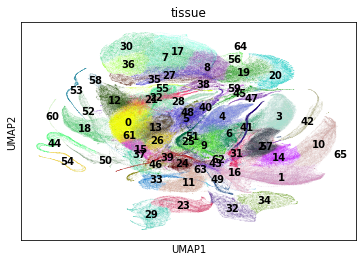

In [ ]:
# random.seed(100)
sc.pl.umap(adata1, legend_loc='on data',color='tissue', palette=list(cmap))

In [ ]:
adata1.write_h5ad('adata_leiden_coronal_1.h5ad')

... storing 'sample' as categorical


In [ ]:
adata1=sc.read_h5ad('output_data/adata_leiden_coronal_1.h5ad')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [ ]:
# tissue_id=adata1.obs['tissue']
# adata1.obs=cell_meta_data_concatenated
# adata1.obs['tissue']=list(tissue_id)
adata1.obs['sample']=list(cell_meta_data_concatenated['sample'])
adata1.obs['col']=list(cell_meta_data_concatenated['col'])
adata1.obs['row']=list(cell_meta_data_concatenated['row'])

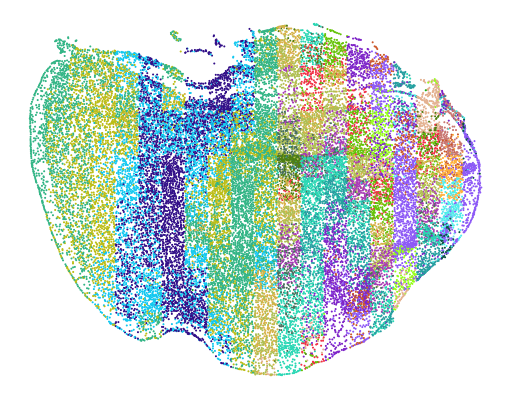

In [ ]:
cmap=np.random.rand(len(adata1.obs['tissue'].unique()),3)
for i in coronals:
  obs_wellplot=adata1.obs.loc[adata1.obs['sample']==i,:]
  # out_tplplot=out_tpl04

  plt.figure(figsize=(int(max(obs_wellplot['row']))/3000,int(max(obs_wellplot['col']))/3000))
  plt.scatter(obs_wellplot['row'],max(obs_wellplot['col'])-obs_wellplot['col'],
            c=cmap[[int(x) for x in obs_wellplot['tissue']]],s=1)
  # plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.0003,alpha=0.5)
  plt.axis('off')
  plt.savefig('output_data/1_'+i+'.png',dpi=300,transparent=True)
  break

(-1353.0, 28413.0, -1689.0, 35469.0)

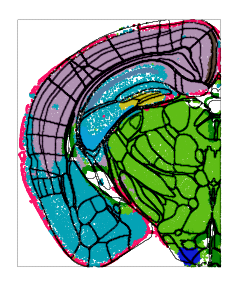

In [ ]:
obs_wellplot=obs_well04
adata1_wellplot=adata1_well04
out_tplplot=out_tpl04

plt.figure(figsize=(4,5))
plt.scatter(obs_wellplot['row'],max(obs_wellplot['col'])-obs_wellplot['col'],
           c=cmap[[int(x) for x in adata1_wellplot.obs['tissue']]],s=1)
plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.0003,alpha=0.5)
plt.axis('off')

(-1281.0, 26901.0, -1398.0, 29358.0)

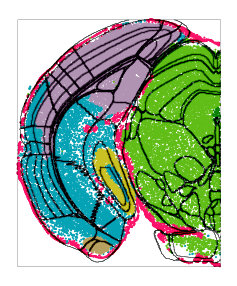

In [ ]:
obs_wellplot=obs_well05
adata1_wellplot=adata1_well05
out_tplplot=out_tpl05

plt.figure(figsize=(4,5))
plt.scatter(max(obs_wellplot['row'])-obs_wellplot['row'],obs_wellplot['col'],
           c=cmap[[int(x) for x in adata1_wellplot.obs['tissue']]],s=1)
plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.0003,alpha=0.5)
plt.axis('off')

(-1353.0, 28413.0, -1417.5, 29767.5)

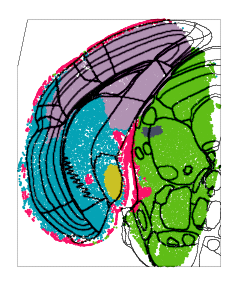

In [ ]:
obs_wellplot=obs_well06
adata1_wellplot=adata1_well06
out_tplplot=out_tpl06

plt.figure(figsize=(4,5))
plt.scatter(obs_wellplot['col'],obs_wellplot['row'],
           c=cmap[[int(x) for x in adata1_wellplot.obs['tissue']]],s=1)
plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.0003,alpha=0.5)
plt.axis('off')

(-1144.5, 24034.5, -1468.0, 30828.0)

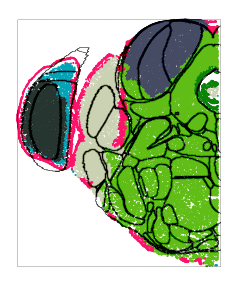

In [ ]:
obs_wellplot=obs_well11
adata1_wellplot=adata1_well11
out_tplplot=out_tpl11

plt.figure(figsize=(4,5))
plt.scatter(max(obs_wellplot['row'])-obs_wellplot['row'],obs_wellplot['col'],
           c=cmap[[int(x) for x in adata1_wellplot.obs['tissue']]],s=1)
plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.0003,alpha=0.5)
plt.axis('off')

In [ ]:
### import ccf ground truth
gt_label04=pd.read_csv('../input/well06_outputobs_withlabel.csv')
gt_label05=pd.read_csv('../input/well07_outputobs_withlabel.csv')
gt_label06=pd.read_csv('../input/well7_5_outputobs_withlabel.csv')
gt_label11=pd.read_csv('../input/well08_outputobs_withlabel.csv')

In [ ]:
adata=adata1.copy()

In [ ]:
import random
random.seed(100)
cmap=np.random.rand(50,3)

In [ ]:
obs_wellplot=obs_well04
gt_labelplot=gt_label04
out_tplplot=out_tpl04

obs_wellplot['tissueid']=list(adata.obs.iloc[0:num_1]['tissue'])
gt_labelplot=gt_labelplot.set_index('orginindex')
indexlist=[int(i) for i in obs_wellplot['orginindex']]
obs_wellplot['indexlist']=indexlist
obs_wellplot=obs_wellplot.set_index('indexlist')

###find intersection
_,x_ind, y_ind=np.intersect1d(indexlist,gt_labelplot.index,return_indices=True)
gt_labelplot['ccf_cell_label_id']=gt_labelplot['ccf_cell_label_id'].astype('int')
obs_wellplot['tissueid']=obs_wellplot['tissueid'].astype('int')

###convert gt into most likely region id
labela=list(obs_wellplot.loc[obs_wellplot.index[x_ind],'tissueid'].unique())
labelb=list(gt_labelplot.loc[gt_labelplot.index[y_ind],'ccf_cell_label_id'].unique())


list_obs=obs_wellplot.loc[obs_wellplot.index[x_ind],'tissueid']
list_gt=list(gt_labelplot.loc[gt_labelplot.index[y_ind],'ccf_cell_label_id'])

list_gt_all=list(gt_labelplot.loc[gt_labelplot.index[y_ind],'ccf_cell_label_id'])
for i in labelb:
    targetindex=pd.value_counts(list_obs[list_gt==i]).index[0]
    for j in np.where(list_gt==i)[0]:
        list_gt_all[j]=targetindex
     

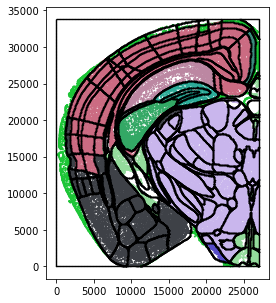

In [ ]:
   
###plot
plt.figure(figsize=(4,5))
plt.scatter(obs_wellplot.loc[obs_wellplot.index[x_ind],'row'],
    
            max(obs_wellplot['col'])-obs_wellplot.loc[obs_wellplot.index[x_ind],'col'],
           c=cmap[[int(x) for x in list_gt_all]],s=1)
plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.03,alpha=0.5)

In [ ]:
adata.obs.iloc[0:num_1].iloc[x_ind]['ccf']=list_gt_all

In [ ]:
obs_wellplot=obs_well05
gt_labelplot=gt_label05
out_tplplot=out_tpl05

obs_wellplot['tissueid']=list(adata.obs.iloc[num_1:num_1+num_2]['tissue'])
gt_labelplot=gt_labelplot.set_index('orginindex')
indexlist=[int(i) for i in obs_wellplot['orginindex']]
obs_wellplot['indexlist']=indexlist
obs_wellplot=obs_wellplot.set_index('indexlist')

###find intersection
_,x_ind, y_ind=np.intersect1d(indexlist,gt_labelplot.index,return_indices=True)
gt_labelplot['ccf_cell_label_id']=gt_labelplot['ccf_cell_label_id'].astype('int')
obs_wellplot['tissueid']=obs_wellplot['tissueid'].astype('int')

###convert gt into most likely region id
labela=list(obs_wellplot.loc[obs_wellplot.index[x_ind],'tissueid'].unique())
labelb=list(gt_labelplot.loc[gt_labelplot.index[y_ind],'ccf_cell_label_id'].unique())


list_obs=obs_wellplot.loc[obs_wellplot.index[x_ind],'tissueid']
list_gt=list(gt_labelplot.loc[gt_labelplot.index[y_ind],'ccf_cell_label_id'])

list_gt_all=list(gt_labelplot.loc[gt_labelplot.index[y_ind],'ccf_cell_label_id'])
for i in labelb:
    targetindex=pd.value_counts(list_obs[list_gt==i]).index[0]
    for j in np.where(list_gt==i)[0]:
        list_gt_all[j]=targetindex
     

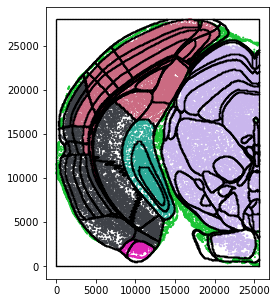

In [ ]:
   
###plot
plt.figure(figsize=(4,5))
plt.scatter(
            max(obs_wellplot['row'])-obs_wellplot.loc[obs_wellplot.index[x_ind],'row'],
    obs_wellplot.loc[obs_wellplot.index[x_ind],'col'],
           c=cmap[[int(x) for x in list_gt_all]],s=1)
plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.03,alpha=0.5)

In [ ]:
adata.obs.iloc[num_1:num_1+num_2].iloc[x_ind]['ccf']=list_gt_all

In [ ]:
obs_wellplot=obs_well06
gt_labelplot=gt_label06
out_tplplot=out_tpl06

obs_wellplot['tissueid']=list(adata.obs.iloc[num_1+num_2:num_1+num_2+num_3]['tissue'])
gt_labelplot=gt_labelplot.set_index('orginindex')
indexlist=[int(i) for i in obs_wellplot['orginindex']]
obs_wellplot['indexlist']=indexlist
obs_wellplot=obs_wellplot.set_index('indexlist')

###find intersection
_,x_ind, y_ind=np.intersect1d(indexlist,gt_labelplot.index,return_indices=True)
gt_labelplot['ccf_cell_label_id']=gt_labelplot['ccf_cell_label_id'].astype('int')
obs_wellplot['tissueid']=obs_wellplot['tissueid'].astype('int')

###convert gt into most likely region id
labela=list(obs_wellplot.loc[obs_wellplot.index[x_ind],'tissueid'].unique())
labelb=list(gt_labelplot.loc[gt_labelplot.index[y_ind],'ccf_cell_label_id'].unique())


list_obs=obs_wellplot.loc[obs_wellplot.index[x_ind],'tissueid']
list_gt=list(gt_labelplot.loc[gt_labelplot.index[y_ind],'ccf_cell_label_id'])

list_gt_all=list(gt_labelplot.loc[gt_labelplot.index[y_ind],'ccf_cell_label_id'])
for i in labelb:
    targetindex=pd.value_counts(list_obs[list_gt==i]).index[0]
    for j in np.where(list_gt==i)[0]:
        list_gt_all[j]=targetindex
     

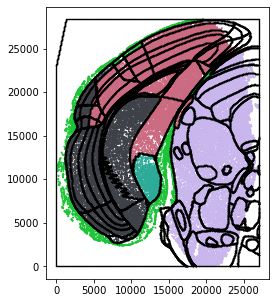

In [ ]:
   
###plot
plt.figure(figsize=(4,5))
plt.scatter(   obs_wellplot.loc[obs_wellplot.index[x_ind],'col'],

             obs_wellplot.loc[obs_wellplot.index[x_ind],'row'],
           c=cmap[[int(x) for x in list_gt_all]],s=1)
plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.03,alpha=0.5)

In [ ]:
adata.obs.iloc[num_1+num_2:num_1+num_2+num_3].iloc[x_ind]['ccf']=list_gt_all

In [ ]:
obs_wellplot=obs_well11
gt_labelplot=gt_label11
out_tplplot=out_tpl11

obs_wellplot['tissueid']=list(adata.obs.iloc[num_1+num_2+num_3:num_1+num_2+num_3+num_4]['tissue'])
gt_labelplot=gt_labelplot.set_index('orginindex')
indexlist=[int(i) for i in obs_wellplot['orginindex']]
obs_wellplot['indexlist']=indexlist
obs_wellplot=obs_wellplot.set_index('indexlist')

###find intersection
_,x_ind, y_ind=np.intersect1d(indexlist,gt_labelplot.index,return_indices=True)
gt_labelplot['ccf_cell_label_id']=gt_labelplot['ccf_cell_label_id'].astype('int')
obs_wellplot['tissueid']=obs_wellplot['tissueid'].astype('int')

###convert gt into most likely region id
labela=list(obs_wellplot.loc[obs_wellplot.index[x_ind],'tissueid'].unique())
labelb=list(gt_labelplot.loc[gt_labelplot.index[y_ind],'ccf_cell_label_id'].unique())


list_obs=obs_wellplot.loc[obs_wellplot.index[x_ind],'tissueid']
list_gt=list(gt_labelplot.loc[gt_labelplot.index[y_ind],'ccf_cell_label_id'])

list_gt_all=list(gt_labelplot.loc[gt_labelplot.index[y_ind],'ccf_cell_label_id'])
for i in labelb:
    targetindex=pd.value_counts(list_obs[list_gt==i]).index[0]
    for j in np.where(list_gt==i)[0]:
        list_gt_all[j]=targetindex
     

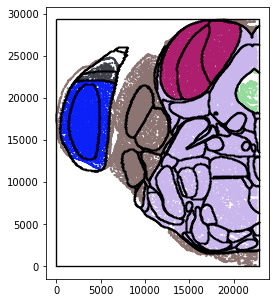

In [ ]:
   
###plot
plt.figure(figsize=(4,5))
plt.scatter(max(obs_wellplot['row'])-obs_wellplot.loc[obs_wellplot.index[x_ind],'row'],
    obs_wellplot.loc[obs_wellplot.index[x_ind],'col'],
           c=cmap[[int(x) for x in list_gt_all]],s=1)
plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.03,alpha=0.5)

In [ ]:
adata.obs.iloc[num_1+num_2+num_3:num_1+num_2+num_3+num_4].iloc[x_ind]['ccf']=list_gt_all

subclustering of each tissue region

In [ ]:
adatacopy=adata.copy()
from sklearn.cluster import AgglomerativeClustering
adatacopy.obs['tissue']=adatacopy.obs['tissue'].astype('int')

# for i in adata1.obs['tissue'].unique():
#     print(i)

In [ ]:
i=0

labels = AgglomerativeClustering(n_clusters=3).fit(adatacopy.obsm['X_pca'][adatacopy.obs['tissue']==i,:]).labels_
adatacopy.obs['tissue']=adatacopy.obs['tissue'].astype('int')
adatacopy.obs.loc[adatacopy.obs['tissue']==i,'tissue']=list(labels+max(adatacopy.obs['tissue'].unique())+1)

In [ ]:
i=1

labels = AgglomerativeClustering(n_clusters=3).fit(adata1.obsm['X_pca'][adatacopy.obs['tissue']==i,:]).labels_
adatacopy.obs['tissue']=adatacopy.obs['tissue'].astype('int')
adatacopy.obs.loc[adatacopy.obs['tissue']==i,'tissue']=list(labels+max(adatacopy.obs['tissue'].unique())+1)

In [ ]:
i=2

labels = AgglomerativeClustering(n_clusters=3).fit(adata1.obsm['X_pca'][adatacopy.obs['tissue']==i,:]).labels_
adatacopy.obs['tissue']=adatacopy.obs['tissue'].astype('int')
adatacopy.obs.loc[adatacopy.obs['tissue']==i,'tissue']=list(labels+max(adatacopy.obs['tissue'].unique())+1)

In [ ]:
i=3

labels = AgglomerativeClustering(n_clusters=2).fit(adatacopy.obsm['X_pca'][adatacopy.obs['tissue']==i,:]).labels_
adatacopy.obs['tissue']=adatacopy.obs['tissue'].astype('int')
adatacopy.obs.loc[adatacopy.obs['tissue']==i,'tissue']=list(labels+max(adatacopy.obs['tissue'].unique())+1)

In [ ]:
i=4

labels = AgglomerativeClustering(n_clusters=2).fit(adatacopy.obsm['X_pca'][adatacopy.obs['tissue']==i,:]).labels_
adatacopy.obs['tissue']=adatacopy.obs['tissue'].astype('int')
adatacopy.obs.loc[adatacopy.obs['tissue']==i,'tissue']=list(labels+max(adatacopy.obs['tissue'].unique())+1)

In [ ]:
i=5

labels = AgglomerativeClustering(n_clusters=2).fit(adatacopy.obsm['X_pca'][adatacopy.obs['tissue']==i,:]).labels_
adatacopy.obs['tissue']=adatacopy.obs['tissue'].astype('int')
adatacopy.obs.loc[adatacopy.obs['tissue']==i,'tissue']=list(labels+max(adatacopy.obs['tissue'].unique())+1)

In [ ]:
i=15

labels = AgglomerativeClustering(n_clusters=2).fit(adatacopy.obsm['X_pca'][adatacopy.obs['tissue']==i,:]).labels_
adatacopy.obs['tissue']=adatacopy.obs['tissue'].astype('int')
adatacopy.obs.loc[adatacopy.obs['tissue']==i,'tissue']=list(labels+max(adatacopy.obs['tissue'].unique())+1)

In [ ]:
test=adatacopy.copy()

In [ ]:
adatacopy=test.copy()

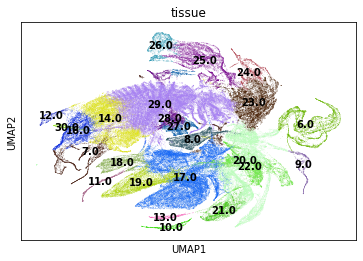

In [ ]:
adatacopy.obs['tissue']=adatacopy.obs['tissue'].astype('category')
import random
np.random.seed(1)
cmap=np.random.rand(1+int(max(adatacopy.obs['tissue'].unique())),3)

sc.pl.umap(adatacopy, legend_loc='on data',color='tissue', palette=list(cmap))

In [ ]:
adata1_well04=adatacopy[0:num_1,:].copy()
adata1_well05=adatacopy[num_1:num_1+num_2,:].copy()
adata1_well06=adatacopy[num_1+num_2:num_1+num_2+num_3 ,:].copy()
adata1_well11=adatacopy[num_1+num_2+num_3:num_1+num_2+num_3+num_4,:].copy()

(-1353.0, 28413.0, -1689.0, 35469.0)

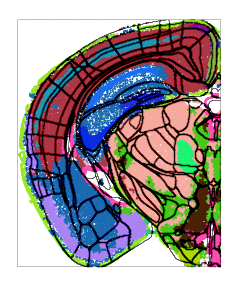

In [ ]:
obs_wellplot=obs_well04
adata1_wellplot=adata1_well04
out_tplplot=out_tpl04

plt.figure(figsize=(4,5))
plt.scatter(obs_wellplot['row'],max(obs_wellplot['col'])-obs_wellplot['col'],
           c=cmap[[int(x) for x in adata1_wellplot.obs['tissue']]],s=1)
plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.0003,alpha=0.5)
plt.axis('off')

(-1281.0, 26901.0, -1398.0, 29358.0)

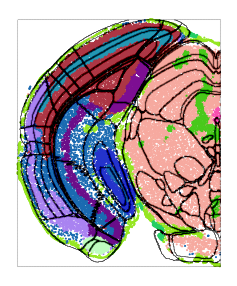

In [ ]:
obs_wellplot=obs_well05
adata1_wellplot=adata1_well05
out_tplplot=out_tpl05

plt.figure(figsize=(4,5))
plt.scatter(max(obs_wellplot['row'])-obs_wellplot['row'],obs_wellplot['col'],
           c=cmap[[int(x) for x in adata1_wellplot.obs['tissue']]],s=1)
plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.0003,alpha=0.5)
plt.axis('off')

(-1353.0, 28413.0, -1417.5, 29767.5)

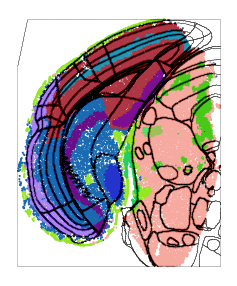

In [ ]:
obs_wellplot=obs_well06
adata1_wellplot=adata1_well06
out_tplplot=out_tpl06

plt.figure(figsize=(4,5))
plt.scatter(obs_wellplot['col'],obs_wellplot['row'],
           c=cmap[[int(x) for x in adata1_wellplot.obs['tissue']]],s=1)
plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.0003,alpha=0.5)
plt.axis('off')

(-1144.5, 24034.5, -1468.0, 30828.0)

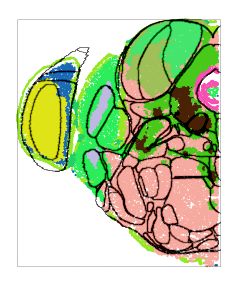

In [ ]:
obs_wellplot=obs_well11
adata1_wellplot=adata1_well11
out_tplplot=out_tpl11

plt.figure(figsize=(4,5))
plt.scatter(max(obs_wellplot['row'])-obs_wellplot['row'],obs_wellplot['col'],
           c=cmap[[int(x) for x in adata1_wellplot.obs['tissue']]],s=1)
plt.scatter(out_tplplot[1]*10,max(out_tplplot[0]*10)-out_tplplot[0]*10,c='k',s=0.0003,alpha=0.5)
plt.axis('off')

In [ ]:
adatacopy.write('groupg_sub.h5ad')

In [ ]:
###write results
adatacopy.obs.to_csv('tissue_leidenclustering//well04.csv')

In [ ]:
tissueidlist=list(adatacopy.obs['tissue'])

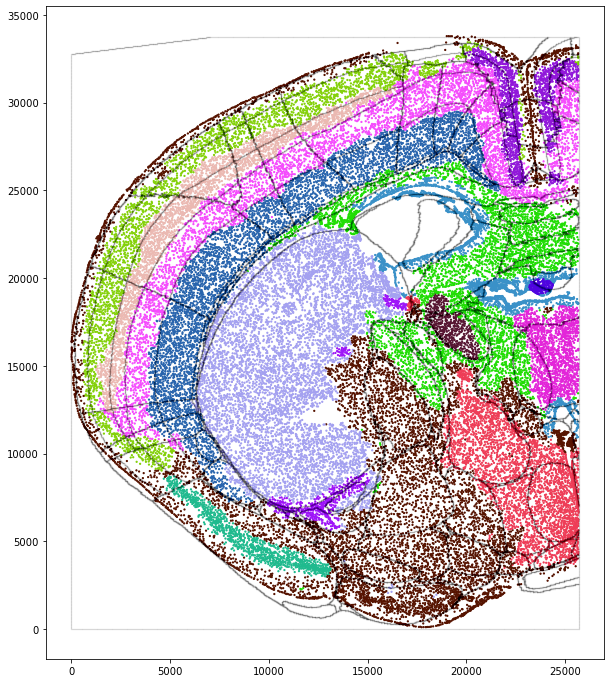

In [ ]:
plt.figure(figsize=(10,12))
plt.scatter(max(obs_well['row'])-obs_well['row'],obs_well['col'],
           c=cmap[[int(x)+3 for x in tissueidlist]],s=1.5)
plt.scatter(out_tpl[1]*10,max(out_tpl[0]*10)-out_tpl[0]*10,c='k',s=0.0003,alpha=0.5)

In [ ]:
# import networkx
# import stellargraph as sg
# from scipy.spatial import cKDTree as KDTree

In [ ]:
# def keep_neighbors_distance(spots, use_z=False):
#     '''
#     Determines the maximum distance to build an edge between two nodes
#     params :    - spots (dataframe) = spatial locations and gene identity
#                 - use_z (bool) = use the third dimension in our model    
    
#     returns :   - d_th (float) = threshold to connect nodes in the future graph
#     '''
#     if use_z:
#         kdT = KDTree(np.array([spots[:,0], spots[:,1], spots[:,2]]).T)
#         # evaluate the distance to the nearest neighbors (we put k=2 because a spot is its own neighbor)
#         distance, indices = kdT.query(np.array([spots[:,0], spots[:,1], spots[:,2]]).T, k=2)
#     else:
#         kdT = KDTree(np.array([spots[:,0], spots[:,1]]).T)
#         distance, indices =  kdT.query(np.array([spots[:,0], spots[:,1]]).T, k=2)
    
#     d_th = np.percentile(distance[:,1], 95)
#     return(d_th)


In [ ]:
# d_th = keep_neighbors_distance(X_data, use_z=True)


In [ ]:
# for targetclass in adatacopy.obs['tissue'].unique():
# #     plt.figure(figsize=(5,6))
# #     plt.scatter(max(obs_well['row'])-obs_well.loc[list(adata1.obs['tissue']==targetclass),'row'],
# #                 obs_well.loc[list(adata1.obs['tissue']==targetclass),'col'],
# #                color=cmap[int(targetclass)],s=1)
# #     plt.scatter(out_tpl[1]*10,max(out_tpl[0]*10)-out_tpl[0]*10,c='k',s=0.0001,alpha=0.5)
# #     plt.title(targetclass)
#     X_target=np.array(obs_well.loc[list(adatacopy.obs['tissue']==targetclass),['row','col','z']])
#     edges = find_edges(X_target, d_th, True, False)
#     G = sg.StellarGraph(edges=edges,source_column='source', target_column='target')
#     for component in tqdm(list(G.connected_components())):
#         if len(component)<20:
#             for i in adatacopy.obs.loc[list(adatacopy.obs['tissue']==targetclass),:].iloc[component].index:
#                 tissueidlist[int(i)]=-1
# #             plt.scatter(X_target[component,0],
# #                     X_target[component,1],
# #                     s=1)

In [ ]:
# cmap[0]=np.array([1,1,1])

# plt.figure(figsize=(10,12))
# plt.scatter(max(obs_well['row'])-obs_well['row'],obs_well['col'],
#            c=cmap[[int(x)+1 for x in tissueidlist]],s=1)
# plt.scatter(out_tpl[1]*10,max(out_tpl[0]*10)-out_tpl[0]*10,c='k',s=0.0003,alpha=0.5)

In [ ]:
# ##knn to smooth boundary
# n_neighbors=15
# knn = NearestNeighbors(n_neighbors=n_neighbors)
# X_data=np.array(obs_well[['col','row','z']])
# knn.fit(X_data)
# res_neighbors = knn.kneighbors(X_data, return_distance=False)

In [ ]:
# knn_test = NearestNeighbors(n_neighbors=70)
# knn_test.fit(X_data)

NearestNeighbors(n_neighbors=70)

In [ ]:
# for ind,i in tqdm(enumerate(tissueidlist)):
#     if i==-1:
#         neighbors_value=np.array(tissueidlist)[res_neighbors[ind]]
        
#         if pd.value_counts(neighbors_value).shape[0]==1 and neighbors_value[0]==-1:
#             res_neighbors_50 = knn_test.kneighbors(X_data[ind,:].reshape(1, -1), return_distance=False)
#             neighbors_value=np.array(tissueidlist)[res_neighbors_50]
#             if pd.value_counts(neighbors_value[0]).shape[0]==1 and neighbors_value[0][0]==-1:
#                 print('error')
#                 break
#             if pd.value_counts(neighbors_value[0]).index[0]==-1:
#                 tissueidlist[ind]=pd.value_counts(neighbors_value[0]).index[1]
#             else:
#                 tissueidlist[ind]=pd.value_counts(neighbors_value[0]).index[0]
#         else:
#             if pd.value_counts(neighbors_value).index[0]==-1:
#                 tissueidlist[ind]=pd.value_counts(neighbors_value).index[1]
#             else:
#                 tissueidlist[ind]=pd.value_counts(neighbors_value).index[0]

44191it [00:47, 929.70it/s] 


In [ ]:
# random.seed(1030)
# cmap=np.random.rand(10+len(np.unique(new_tissueid)),3)

In [ ]:
# plt.figure(figsize=(10,12))
# plt.scatter(max(obs_well['row'])-obs_well['row'],obs_well['col'],
#            c=cmap[[int(x)+2 for x in new_tissueid]],s=1.5)
# plt.scatter(out_tpl[1]*10,max(out_tpl[0]*10)-out_tpl[0]*10,c='k',s=0.0003,alpha=0.5)

In [ ]:
cluster_label='tissue'

In [ ]:
### import ccf ground truth
gt_label=pd.read_csv('../input/well04_outputobs_withlabel.csv')

In [ ]:
obs_well['tissueid']=list(adatacopy.obs[cluster_label])
gt_label=gt_label.set_index('orginindex')
indexlist=[int(i) for i in obs_well['orginindex']]
obs_well['indexlist']=indexlist
obs_well=obs_well.set_index('indexlist')

###find intersection
_,x_ind, y_ind=np.intersect1d(indexlist,gt_label.index,return_indices=True)
gt_label['ccf_cell_label_id']=gt_label['ccf_cell_label_id'].astype('int')
obs_well['tissueid']=obs_well['tissueid'].astype('int')

In [ ]:
###convert gt into most likely region id

labela=list(obs_well.loc[obs_well.index[x_ind],'tissueid'].unique())
labelb=list(gt_label.loc[gt_label.index[y_ind],'ccf_cell_label_id'].unique())


list_obs=obs_well.loc[obs_well.index[x_ind],'tissueid']
list_gt=list(gt_label.loc[gt_label.index[y_ind],'ccf_cell_label_id'])
list_gt_all=list(gt_label.loc[gt_label.index[y_ind],'ccf_cell_label_id'])

for i in labelb:
    targetindex=pd.value_counts(list_obs[list_gt==i]).index[0]
    for j in np.where(list_gt==i)[0]:
        list_gt_all[j]=targetindex

In [ ]:
###compute source1 and target1
labela=list(obs_well.loc[obs_well.index[x_ind],'tissueid'].unique())
labelb=list(np.unique(list_gt_all))

source1=np.zeros(obs_well.loc[obs_well.index[x_ind],'tissueid'].shape[0])
for indi,i in enumerate(obs_well.loc[obs_well.index[x_ind],'tissueid']):
    source1[indi]=int(labela.index(i))
    
target1=np.zeros(len(list_gt_all))
for indi,i in enumerate(list_gt_all):
    target1[indi]=int(labelb.index(i)+len(labela))

###computer source, target and value
source=[]
target=[]
value=[]
for indi,i in enumerate(np.unique(source1)):
    translateTR2id=target1[np.where(source1==i)]
    unique, counts = np.unique(translateTR2id, return_counts=True)
    for indj, j in zip(unique,counts):
#         print(i,indj, j)
        source.append(i)
        target.append(indj)
        value.append(j)
        
### assign colors
labelcolor=cmap[labela]#sns.color_palette('tab20',len(labela+labelb))#.as_hex()
labelcolor=['rgba' + str((*tuple(i*255 for i in j),0.8)) for j in labelcolor]
linkcolor=[np.array(labelcolor)[int(i)].replace("0.8", str(0.4))   for i in source]

###plot
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 21,
      thickness = 10,
      line = dict(color = "black", width = 0.5),
      label = labela+labelb,
      color = labelcolor
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value,
        color=linkcolor
  ))])

fig.update_layout(title_text="Tissue region match", font_size=10,width=800,
    height=800,)
fig.write_html("sankey-diagram-plotly1.html")

fig.show()

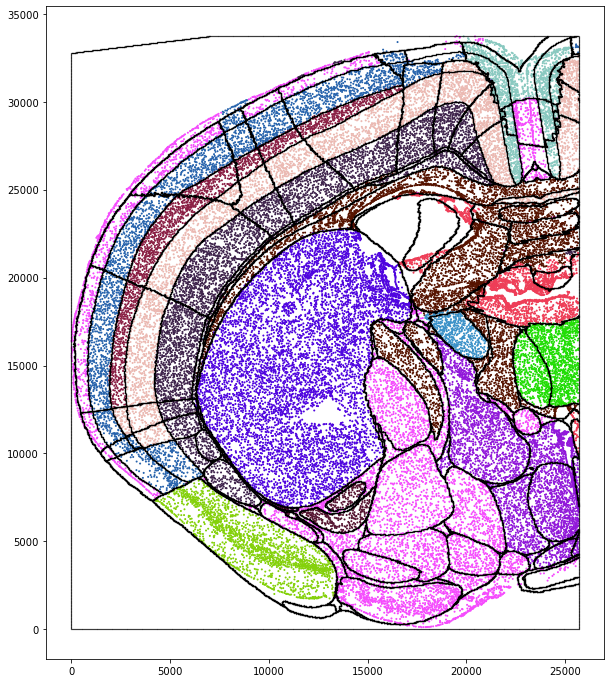

In [ ]:
#merged gt
plt.figure(figsize=(10,12))
plt.scatter(max(obs_well['row'])-obs_well.loc[obs_well.index[x_ind],'row'],obs_well.loc[obs_well.index[x_ind],'col'],
           c=cmap[[int(x) for x in list_gt_all]],s=1)
plt.scatter(out_tpl[1]*10,max(out_tpl[0]*10)-out_tpl[0]*10,c='k',s=0.03,alpha=0.5)

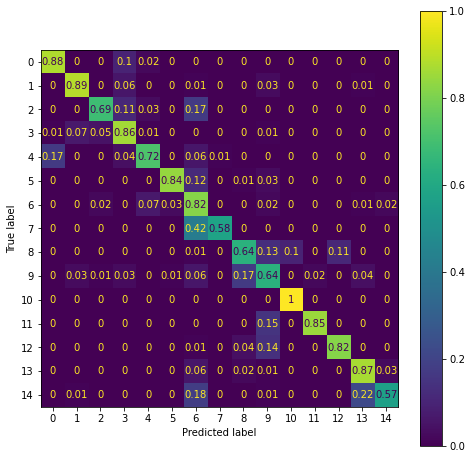

In [ ]:
### confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score,adjusted_mutual_info_score
cm = confusion_matrix( list_gt_all, obs_well.loc[obs_well.index[x_ind],'tissueid'],
                     normalize='true')
fig,ax = plt.subplots(figsize=(8,8))
cm=np.round(cm,2)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(ax=ax)

In [ ]:
metric_with_adj.append([adjusted_rand_score(list_gt_all, obs_well.loc[obs_well.index[x_ind],'tissueid']),
                 accuracy_score(list_gt_all, obs_well.loc[obs_well.index[x_ind],'tissueid']),
                 adjusted_mutual_info_score(list_gt_all, obs_well.loc[obs_well.index[x_ind],'tissueid'])])

In [ ]:
metric_with_adj

[[0.8075098587620372, 0.8952673197214682, 0.7397063846487766],
 [0.6332407570722237, 0.7916912545733507, 0.6984055946703267]]

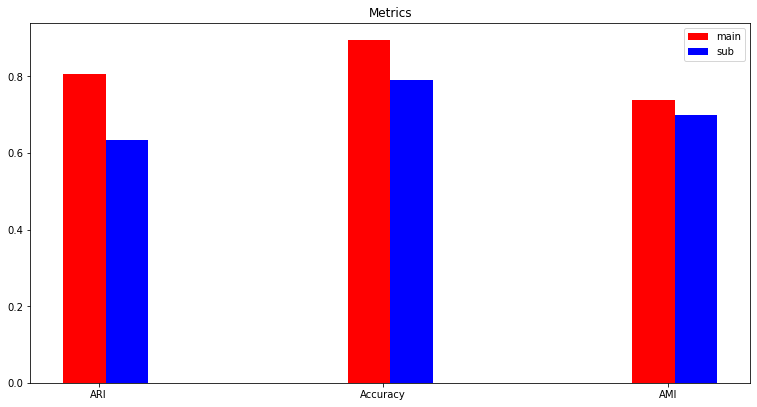

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ind=np.arange(3)
width = 0.15
rects1 = ax.bar(ind,metric_with_adj[0],width,color='r')
rects2 = ax.bar(ind+width,metric_with_adj[1],width,color='b')
# rects3 = ax.bar(ind+2*width,metric_with_adj[7],width,color='g')
# rects4 = ax.bar(ind+3*width,metric_with_adj[3],width,color='y')
# rects5 = ax.bar(ind+4*width,metric_with_adj[4],width,color='r')
ax.set_title('Metrics')
ax.set_xticks(ind+width/3)
ax.set_xticklabels(('ARI','Accuracy','AMI'))
ax.legend( (rects1[0],  rects2[0]), ( 'main','sub') )


In [ ]:
metric_with_adj=[[0.8045813913555082, 0.8957394075298005, 0.7393118332626495],
                 [0.6332407570722237, 0.7916912545733507, 0.6984055946703267]]


In [ ]:
metric_with_adj=pd.DataFrame(metric_with_adj,index=('main','sub'),columns=('ari','acc','ami'))

In [ ]:
metric_with_adj

,ari,acc,ami
main,0.804581,0.895739,0.739312
sub,0.633241,0.791691,0.698406


# Save

In [ ]:
adatacopy.write_h5ad('tissue_leidenclustering//adata//well04.h5ad')
metric_with_adj.to_csv('tissue_leidenclustering//adata//well04metric_with_adj.csv')

In [ ]:
# adata.obs.to_csv ('./new/obs_output.csv', index = True, header=True)